<a href="https://colab.research.google.com/github/aparna-2001/machine_learning_using_python/blob/main/Binary_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sn
from matplotlib import pyplot as plt

In [3]:

headings = [
    'checking_account_status',
    'duration_months',
    'credit_history',
    'purpose',
    'credit_amount',
    'savings_account_bonds',
    'employment_since',
    'installment_rate_pct',
    'personal_status_sex',
    'other_debtors_guarantors',
    'residence_since',
    'property',
    'age',
    'other_installment_plans',
    'housing',
    'existing_credits_count',
    'job',
    'liable_people_count',
    'telephone',
    'foreign_worker',
    'credit_risk'
]

In [4]:
credit_data_df = pd.read_csv('german.data', sep=' ', names = headings)
credit_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   checking_account_status   1000 non-null   object
 1   duration_months           1000 non-null   int64 
 2   credit_history            1000 non-null   object
 3   purpose                   1000 non-null   object
 4   credit_amount             1000 non-null   int64 
 5   savings_account_bonds     1000 non-null   object
 6   employment_since          1000 non-null   object
 7   installment_rate_pct      1000 non-null   int64 
 8   personal_status_sex       1000 non-null   object
 9   other_debtors_guarantors  1000 non-null   object
 10  residence_since           1000 non-null   int64 
 11  property                  1000 non-null   object
 12  age                       1000 non-null   int64 
 13  other_installment_plans   1000 non-null   object
 14  housing                  

In [5]:
credit_data_df['credit_risk'].value_counts()

,count
credit_risk,
1,700
2,300


In [6]:
x_features = list(credit_data_df.columns)
x_features.remove('credit_risk')
x_features

['checking_account_status',
 'duration_months',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_account_bonds',
 'employment_since',
 'installment_rate_pct',
 'personal_status_sex',
 'other_debtors_guarantors',
 'residence_since',
 'property',
 'age',
 'other_installment_plans',
 'housing',
 'existing_credits_count',
 'job',
 'liable_people_count',
 'telephone',
 'foreign_worker']

In [7]:
encoded_credit_df = pd.get_dummies(credit_data_df[x_features], drop_first = True).astype(int)
list(encoded_credit_df.columns)

['duration_months',
 'credit_amount',
 'installment_rate_pct',
 'residence_since',
 'age',
 'existing_credits_count',
 'liable_people_count',
 'checking_account_status_A12',
 'checking_account_status_A13',
 'checking_account_status_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'purpose_A41',
 'purpose_A410',
 'purpose_A42',
 'purpose_A43',
 'purpose_A44',
 'purpose_A45',
 'purpose_A46',
 'purpose_A48',
 'purpose_A49',
 'savings_account_bonds_A62',
 'savings_account_bonds_A63',
 'savings_account_bonds_A64',
 'savings_account_bonds_A65',
 'employment_since_A72',
 'employment_since_A73',
 'employment_since_A74',
 'employment_since_A75',
 'personal_status_sex_A92',
 'personal_status_sex_A93',
 'personal_status_sex_A94',
 'other_debtors_guarantors_A102',
 'other_debtors_guarantors_A103',
 'property_A122',
 'property_A123',
 'property_A124',
 'other_installment_plans_A142',
 'other_installment_plans_A143',
 'housing_A152',
 'housing_A153',

In [8]:
x = sm.add_constant(encoded_credit_df)
#y = credit_data_df['credit_risk']
y = credit_data_df['credit_risk'].map({1:0, 2:1})

In [9]:
train_x, test_x, train_y, test_y = train_test_split(x,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [10]:
logit = sm.Logit(train_y, train_x)
logit_model = logit.fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.452608
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:                  Logit                Method:               MLE       
Dependent Variable:     credit_risk          Pseudo R-squared:     0.258     
Date:                   2026-02-21 13:05     AIC:                  731.6515  
No. Observations:       700                  BIC:                  954.6544  
Df Model:               48                   Log-Likelihood:       -316.83   
Df Residuals:           651                  LL-Null:              -426.75   
Converged:              1.0000               LLR p-value:          7.8045e-24
No. Iterations:         7.0000               Scale:                1.0000    
-----------------------------------------------------------------------------
                               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------
const                          0.4672   1.2893  0.3624 0.7171 -2.0597  2.9942
duration_months                0.0198   0.0111  1.7929 0.0730 -0.0018  0.0415
credit_amount                  0.0001   0.0001  2.5098 0.0121  0.0000  0.0002
installment_rate_pct           0.3471   0.1056  3.2863 0.0010  0.1401  0.5540
residence_since                0.0218   0.1032  0.2108 0.8331 -0.1806  0.2241
age                           -0.0293   0.0116 -2.5195 0.0118 -0.0521 -0.0065
existing_credits_count         0.3377   0.2276  1.4834 0.1380 -0.1085  0.7838
liable_people_count            0.2143   0.3209  0.6679 0.5042 -0.4146  0.8433
checking_account_status_A12   -0.2825   0.2641 -1.0696 0.2848 -0.8001  0.2351
checking_account_status_A13   -0.9467   0.4607 -2.0549 0.0399 -1.8496 -0.0437
checking_account_status_A14   -1.5046   0.2773 -5.4262 0.0000 -2.0481 -0.9611
credit_history_A31             0.0720   0.6349  0.1135 0.9097 -1.1723  1.3164
credit_history_A32            -0.4420   0.4810 -0.9190 0.3581 -1.3847  0.5007
credit_history_A33            -1.0992   0.5392 -2.0388 0.0415 -2.1559 -0.0425
credit_history_A34            -1.4632   0.4924 -2.9717 0.0030 -2.4283 -0.4982
purpose_A41                   -1.6565   0.4361 -3.7989 0.0001 -2.5112 -0.8019
purpose_A410                  -0.9521   0.8465 -1.1247 0.2607 -2.6113  0.7071
purpose_A42                   -1.0981   0.3263 -3.3655 0.0008 -1.7377 -0.4586
purpose_A43                   -1.0147   0.2934 -3.4579 0.0005 -1.5899 -0.4396
purpose_A44                   -0.5344   0.7782 -0.6868 0.4922 -2.0596  0.9908
purpose_A45                   -0.6317   0.6491 -0.9732 0.3305 -1.9039  0.6405
purpose_A46                    0.1820   0.4985  0.3652 0.7150 -0.7950  1.1591
purpose_A48                   -2.1140   1.2278 -1.7218 0.0851 -4.5205  0.2924
purpose_A49                   -0.5624   0.3994 -1.4080 0.1591 -1.3452  0.2204
savings_account_bonds_A62     -0.3141   0.3444 -0.9119 0.3618 -0.9891  0.3610
savings_account_bonds_A63     -0.6561   0.4837 -1.3564 0.1750 -1.6042  0.2920
savings_account_bonds_A64     -1.0924   0.6149 -1.7765 0.0756 -2.2976  0.1128
savings_account_bonds_A65     -0.6663   0.3003 -2.2188 0.0265 -1.2550 -0.0777
employment_since_A72          -0.0647   0.5093 -0.1270 0.8990 -1.0629  0.9336
employment_since_A73          -0.1742   0.4848 -0.3593 0.7194 -1.1243  0.7759
employment_since_A74          -0.4882   0.5253 -0.9294 0.3527 -1.5178  0.5414
employment_since_A75          -0.3425   0.4939 -0.6934 0.4881 -1.3105  0.6256
personal_status_sex_A92       -0.2695   0.5049 -0.5337 0.5936 -1.2591  0.7202
personal_status_sex_A93       -0.7277   0.4983 -1.4605 0.1442 -1.7043  0.2489
personal_status_sex_A94       -0.2190   0.5875 -0.3729 0.7092 -1.3704  0.9323
other_debtors_guarantors_A102  0.0075   0.4992  0.0149 0.9881 -0.9710  0.9859
other_debtors_guarantors_A103 -0.7804   0.4757 -1.6405 0.1009 -1.7128  0.1520
property_A122                  0.4397   0.3032  1.4500 0.1471 -0.1546  1.0341
prope

In [11]:
def get_significant_vars(logit_model):
    var_pvalues_df = pd.DataFrame(logit_model.pvalues)
    var_pvalues_df['vars'] = var_pvalues_df.index
    var_pvalues_df.columns = ['pvalues', 'vars']
    return var_pvalues_df[var_pvalues_df['pvalues'] <= 0.05 ]['vars']

In [12]:
significant_vars = get_significant_vars(logit_model)
significant_vars

,vars
credit_amount,credit_amount
installment_rate_pct,installment_rate_pct
age,age
checking_account_status_A13,checking_account_status_A13
checking_account_status_A14,checking_account_status_A14
credit_history_A33,credit_history_A33
credit_history_A34,credit_history_A34
purpose_A41,purpose_A41
purpose_A42,purpose_A42
purpose_A43,purpose_A43


In [13]:
final_logit = sm.Logit(train_y, sm.add_constant(train_x[significant_vars]))
final_logit_model = final_logit.fit()
final_logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.494013
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:                  Logit               Method:              MLE       
Dependent Variable:     credit_risk         Pseudo R-squared:    0.190     
Date:                   2026-02-21 13:05    AIC:                 715.6189  
No. Observations:       700                 BIC:                 770.2318  
Df Model:               11                  Log-Likelihood:      -345.81   
Df Residuals:           688                 LL-Null:             -426.75   
Converged:              1.0000              LLR p-value:         5.4777e-29
No. Iterations:         6.0000              Scale:               1.0000    
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
const                       -0.2405   0.4655 -0.5166 0.6054 -1.1529  0.6720
credit_amount                0.0002   0.0000  4.8839 0.0000  0.0001  0.0002
installment_rate_pct         0.3494   0.0924  3.7790 0.0002  0.1682  0.5306
age                         -0.0261   0.0093 -2.7946 0.0052 -0.0444 -0.0078
checking_account_status_A13 -0.7374   0.4167 -1.7695 0.0768 -1.5541  0.0794
checking_account_status_A14 -1.4426   0.2219 -6.5015 0.0000 -1.8775 -1.0077
credit_history_A33          -0.6227   0.3324 -1.8732 0.0610 -1.2743  0.0289
credit_history_A34          -1.0195   0.2402 -4.2436 0.0000 -1.4903 -0.5486
purpose_A41                 -1.2663   0.3761 -3.3673 0.0008 -2.0034 -0.5292
purpose_A42                 -0.6939   0.2656 -2.6125 0.0090 -1.2145 -0.1733
purpose_A43                 -0.9637   0.2360 -4.0839 0.0000 -1.4262 -0.5012
savings_account_bonds_A65   -0.5437   0.2674 -2.0335 0.0420 -1.0678 -0.0197
===========================================================================

"""

In [14]:
y_pred_df = pd.DataFrame({ 'actual': test_y,
                         'predicted_prob': final_logit_model.predict(sm.add_constant(test_x[significant_vars]))})

In [15]:
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob
557,1,0.145602
798,0,0.060821
977,0,0.334947
136,0,0.110131
575,0,0.055088
544,0,0.064178
332,1,0.859478
917,1,0.712780
678,0,0.256444
363,0,0.093606


In [16]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob,predicted
557,1,0.145602,0
798,0,0.060821,0
977,0,0.334947,0
136,0,0.110131,0
575,0,0.055088,0
544,0,0.064178,0
332,1,0.859478,1
917,1,0.712780,1
678,0,0.256444,0
363,0,0.093606,0


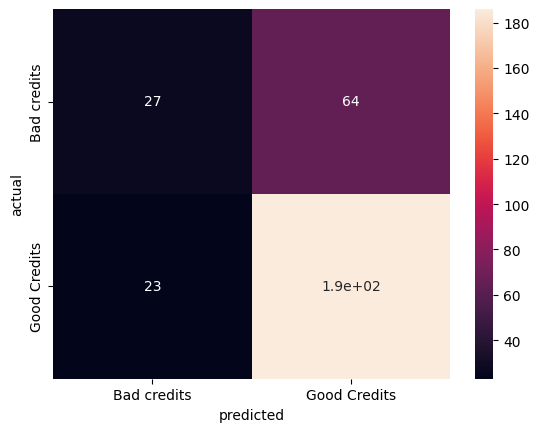

In [18]:
def draw_cm(actual, predicted):
  cm = confusion_matrix(actual, predicted, labels=[1,0])
  sn.heatmap(cm, annot = True,
  xticklabels = ['Bad credits', 'Good Credits'],
  yticklabels = ['Bad credits', 'Good Credits'],)
  plt.ylabel('actual')
  plt.xlabel('predicted')
  plt.show()


draw_cm(y_pred_df.actual, y_pred_df.predicted)

In [ ]:
print(classification_report(y_pred_df.actual,
                            y_pred_df.predicted))

In [ ]:
plt.figure(figsize = (10, 6))
sn.histplot(y_pred_df[y_pred_df.actual == 0]['predicted_prob'],
            kde = False, color ='b', label = 'Bad Credit')
sn.histplot(y_pred_df[y_pred_df.actual == 1]['predicted_prob'],
            kde = False, color = 'g',
            label = 'Good Credit')
plt.legend()
plt.show()

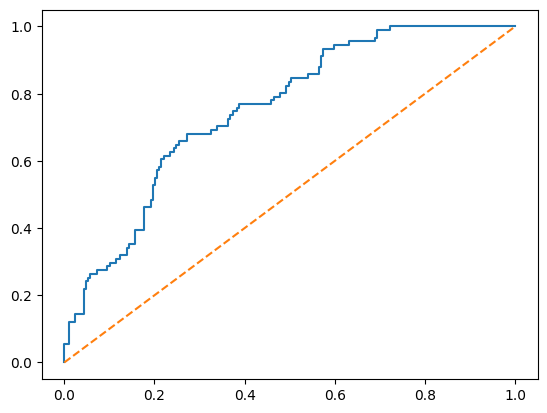

In [19]:

fpr, tpr, thresholds = roc_curve(y_pred_df.actual,
                                 y_pred_df.predicted_prob)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle = '--')

In [20]:


auc_score = roc_auc_score(y_pred_df.actual,
                          y_pred_df.predicted_prob)


round(float(auc_score),2)

0.75

**finding optimal classification cut off**

*youden's index*

In [23]:
tpr_fpr = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds})

tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr

tpr_fpr.sort_values('diff', ascending = False) [0:5]

,tpr,fpr,thresholds,diff
56,0.681319,0.272727,0.293067,0.408591
54,0.659341,0.253589,0.302221,0.405752
52,0.648352,0.248804,0.306701,0.399548
46,0.615385,0.220096,0.343210,0.395289
53,0.648352,0.253589,0.302433,0.394763


* threshold 0.29